# **Functions to load a mesh from the XML file**


***Imports***

In [1]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

***read XML functions***









In [2]:
def loadAllFramesMeshes(filename):
  tree = ET.parse(filename)
  root = tree.getroot()
  # writting the 400 vertexs when initializes the Manipulation
  numFrames = len(root[2])
  frames = []
  for j in range(numFrames):
    mesh_started_frame_coordinates = root[2][j][11][0][0]
    mesh = []
    numVertices=len(mesh_started_frame_coordinates)
    for i in range(numVertices):
      x=float(mesh_started_frame_coordinates[i][0].attrib['x'])
      y=float(mesh_started_frame_coordinates[i][0].attrib['y'])
      z=float(mesh_started_frame_coordinates[i][0].attrib['z'])
      mesh.append([x,y,z])
    frames.append(mesh)

  return frames

#Function to obtain the cloth border given a mesh of the cloth from the VR simulator.
def getSquaredBorder(mesh, sideSize):
    s1 = list(range(0, sideSize-1))
    s2 = [(i+1)*sideSize-1 for i in range(0, sideSize-1)]
    s3 = [sideSize*sideSize-i-1 for i in range(0, sideSize-1)]
    s4 = list(reversed([(i+1)*sideSize for i in range(0, sideSize-1)]))
    borderInd = s1 + s2 + s3 + s4
    return [mesh[i] for i in borderInd]

In [3]:
testFrames=loadAllFramesMeshes("1PC_1PC_1PC_1PC_03_01.xml")
len(testFrames)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

# New Section

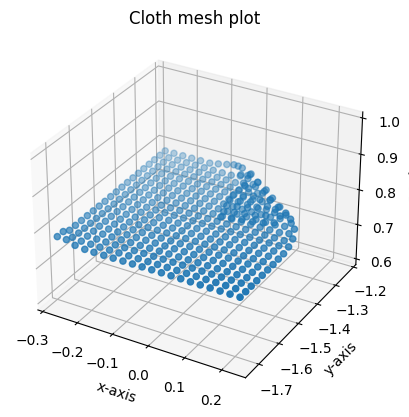

In [ ]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection = '3d')
ax = plt.axes(projection='3d')
ax.scatter3D(*zip(*testFrames[100]))
ax.axis('equal')
# setting title and labels
ax.set_title("Cloth mesh plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

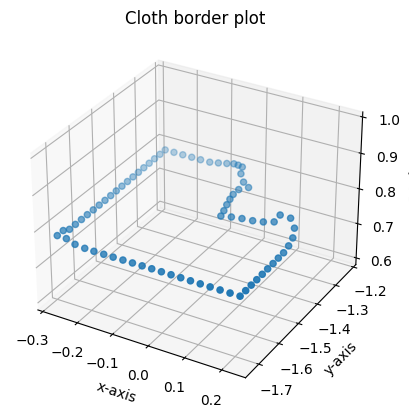

In [ ]:
clothSideSize=20
border=getSquaredBorder(testFrames[100],clothSideSize)

fig = plt.figure()
#ax = fig.add_subplot(111, projection = '3d')
ax = plt.axes(projection='3d')
ax.scatter3D(*zip(*border))
ax.axis('equal')
# setting title and labels
ax.set_title("Cloth border plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()
